In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: /home/fahad/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [444]:
import pandas as pd

df = pd.read_csv(f"{path}/books.csv")

In [445]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


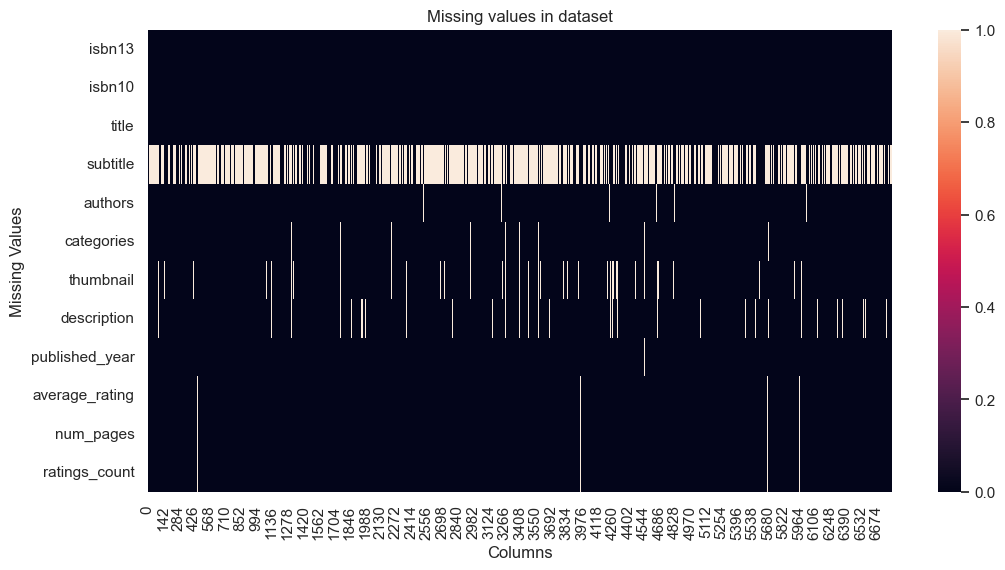

In [446]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
ax = plt.axes()
sns.heatmap(df.isna().transpose(),ax=ax)
plt.title("Missing values in dataset")
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.show()

In [447]:
import numpy as np

df['is_missing_description'] = np.where(df['description'].isna(),1,0)
df['age_of_book'] = 2025 - df['published_year']

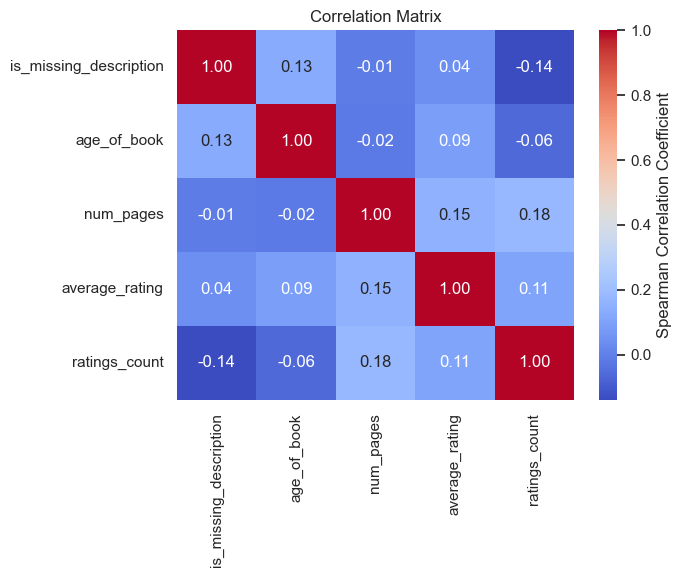

<Figure size 1200x600 with 0 Axes>

In [448]:
cols_of_intrest = ['is_missing_description','age_of_book','num_pages','average_rating','ratings_count']

correlation_matrix = df[cols_of_intrest].corr(method='spearman')

ax = plt.axes()
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',ax=ax,cmap='coolwarm',cbar_kws={'label':'Spearman Correlation Coefficient'})
sns.set_theme(style='white')
plt.title("Correlation Matrix")
plt.figure(figsize=(12,6))
plt.show()

In [449]:
df.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count', 'is_missing_description', 'age_of_book'],
      dtype='object')

In [450]:
df = df[
    ~(df['description'].isna()) &
    ~(df['num_pages'].isna()) &
    ~(df['average_rating'].isna()) &
    ~(df['published_year'].isna()) &
    ~(df['ratings_count'].isna()) 
]

<Axes: xlabel='categories'>

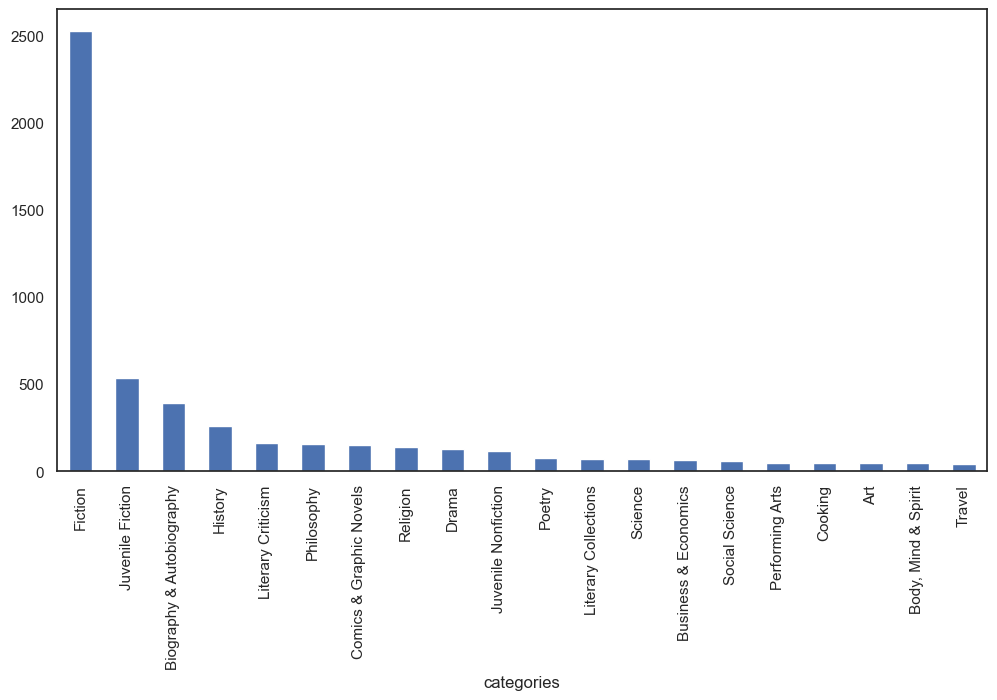

In [451]:
df.categories.value_counts()[:20].plot(kind='bar',figsize=(12,6))

In [452]:
df['description_len'] = df.description.apply(lambda x: len(x.split()))

In [453]:
df.description_len.describe()

count    6507.000000
mean       66.325803
std        66.120291
min         1.000000
25%        27.000000
50%        40.000000
75%        82.000000
max       920.000000
Name: description_len, dtype: float64

<Axes: xlabel='description_len'>

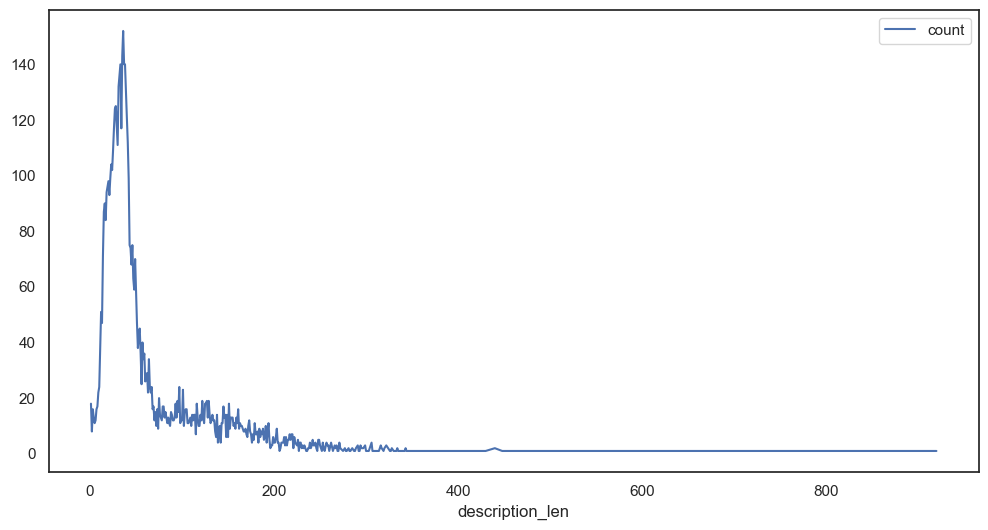

In [454]:
df.description_len.value_counts().sort_index().reset_index().plot(y='count',x='description_len',figsize=(12,6))

In [455]:
df['desc_above_25_words'] = df.description_len.between(25,400).astype(int)

In [456]:
desc_above_25_words = df[df.desc_above_25_words==1]
len(desc_above_25_words)

5176

In [457]:
desc_above_25_words['title and subtitle'] = np.where(
    desc_above_25_words['subtitle'].isna(),
    desc_above_25_words['title'],
    desc_above_25_words[['title','subtitle']].astype(str).agg(': '.join,axis=1)
)

/tmp/ipykernel_26116/3270048438.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [458]:
desc_above_25_words['title and subtitle']

0                                                  Gilead
1                                   Spider's Web: A Novel
3                                          Rage of angels
4                                          The Four Loves
5                                     The Problem of Pain
                              ...                        
6802                                    Mistaken Identity
6803                                  Journey to the East
6804    The Monk Who Sold His Ferrari: A Fable About F...
6805       I Am that: Talks with Sri Nisargadatta Maharaj
6808                             The Berlin Phenomenology
Name: title and subtitle, Length: 5176, dtype: object

In [459]:
desc_above_25_words['tagged_description'] = desc_above_25_words[['isbn13','description']].astype(str).agg(' '.join,axis=1)

/tmp/ipykernel_26116/3495104635.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [460]:
desc_above_25_words.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count', 'is_missing_description', 'age_of_book',
       'description_len', 'desc_above_25_words', 'title and subtitle',
       'tagged_description'],
      dtype='object')

In [461]:
cleaned_df = desc_above_25_words.drop(columns=['subtitle','is_missing_description','age_of_book','description_len','desc_above_25_words'])

In [462]:
cleaned_df.shape

(5176, 13)

In [463]:

cleaned_df.to_csv('books_cleaned.csv',index=False)

### Description Embedding

In [464]:
cleaned_df = pd.read_csv('books_cleaned.csv')
cleaned_df.head()

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title and subtitle,tagged_description
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."


In [465]:
cleaned_df['tagged_description'].to_csv('tagged_descriptions.txt',index=False,header=False)

In [466]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma

In [467]:
raw_docs = TextLoader('tagged_descriptions.txt').load()
text_splitter = CharacterTextSplitter(chunk_size=1,chunk_overlap=0,separator="\n")

In [469]:
docs = text_splitter.split_documents(raw_docs)

Created a chunk of size 1170, which is longer than the specified 1
Created a chunk of size 1216, which is longer than the specified 1
Created a chunk of size 375, which is longer than the specified 1
Created a chunk of size 311, which is longer than the specified 1
Created a chunk of size 483, which is longer than the specified 1
Created a chunk of size 484, which is longer than the specified 1
Created a chunk of size 962, which is longer than the specified 1
Created a chunk of size 188, which is longer than the specified 1
Created a chunk of size 845, which is longer than the specified 1
Created a chunk of size 296, which is longer than the specified 1
Created a chunk of size 197, which is longer than the specified 1
Created a chunk of size 881, which is longer than the specified 1
Created a chunk of size 1090, which is longer than the specified 1
Created a chunk of size 1191, which is longer than the specified 1
Created a chunk of size 306, which is longer than the specified 1
Create

In [470]:
len(docs)

5176

In [162]:
import os

from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

```python
embedds = model.encode([doc.page_content for doc in docs],
                        normalize_embeddings=True,
                        show_progress_bar=True
                    )
pd.DataFrame(embedds).to_csv('embeddings.csv',index=False)
```

In [ ]:
df = pd.read_csv('embeddings.csv')
embds = df.values

In [473]:
embds.shape

(5176, 384)

In [440]:
book_db = Chroma(
    collection_name="books_collection",
    embedding_function=None,
)

In [474]:
book_db._collection.add(
    embeddings=embds,
    documents=[doc.page_content for doc in docs],
    ids=[f"doc_{i}" for i in range(len(docs))]
)

In [475]:
query = 'A book to children about nature'
query_vec = model.encode([query], normalize_embeddings=True)[0]

In [479]:
hits = book_db._collection.query(
    query_embeddings=[query_vec],
    n_results=5
)

In [480]:
hits['documents']

[['"9780786808069 Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience."',
  '"9780786808380 Introduce your babies to birds, cats, dogs, and babies through fine art, illustration, and photographs. These books are a rare opportunity to expose little ones to a range of images on a single subject, from simple child\'s drawings and abstract art to playful photos. A brief text accompanies each image, introducing the baby to some basic -- and sometimes playful -- information about the subjects."',
  '"9780060959036 Barbara Kingsolver\'s fifth novel is a hymn to wildness that celebrates the prodigal spirit of human nature, and of nature itself. It weaves together three stories of human love within a larger tapestry of lives amid the mountains and farms of southern Appalachia. Over the c

In [481]:
def get_recommendations(query, book_db = book_db, model = model, n_results=5):
    query_vec = model.encode([query],normalize_embeddings=True)[0]
    recommendations = book_db._collection.query(
        query_embeddings=[query_vec],
        n_results=n_results
    )
    ids = list(int(i[1:14]) for i in recommendations['documents'][0])
    return cleaned_df[cleaned_df['isbn13'].isin(ids)]

In [482]:
top_books = get_recommendations("Heal from a breakup")
top_books['description'].values

array(["The new warm and absorbing story from the author of PS, I LOVE YOU is a bittersweet tale of childhood friends Rosie and Alex whose relationship must survive many trials and tribulations, not least the discovery of their true feelings for one another.From naughty children to rebellious teenagers and mixed-up twenty- and thirty-somethings, Rosie and Alex have stuck by each other through thick and thin, even when Alex moved across the Atlantic to Boston and Rosie fell pregnant as a teenager. Alex supportsRosie through one of the most difficult times of her life -- a time when she should be out partying and going to university but is instead changing nappies and coping with a screaming baby. In return, Rosie is there for Alex when he strugglesthrough his medical internship and copes with a messy divorce. Throughout the ups and downs of each other's lives, they have remained a constant, a shoulder to cry on, someone to laugh and share their innermost feelings with.But can their frie

## Text classification (Zero-Shot Classification)

In [483]:
import plotly_express as px
px.bar(cleaned_df.categories.value_counts()[:30])

In [487]:
top_categories = cleaned_df.categories.value_counts().reset_index().categories[:10].values

In [488]:
cleaned_df[cleaned_df['categories'].isin(top_categories)]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title and subtitle,tagged_description
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
8,9780006482079,0006482074,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,Warhost of Vastmark,9780006482079 Tricked once more by his wily ha...
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express,9780006646006 Joe and his parents are enjoying...
46,9780007121014,0007121016,Taken at the Flood,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,A Few Weeks After Marrying An Attractive Young...,2002.0,3.71,352.0,8852.0,Taken at the Flood,9780007121014 A Few Weeks After Marrying An At...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5157,9781933648279,1933648279,Night Has a Thousand Eyes,Cornell Woolrich,Fiction,http://books.google.com/books/content?id=3Gk6s...,"""Cornell Woolrich's novels define the essence ...",2007.0,3.77,344.0,680.0,Night Has a Thousand Eyes,"9781933648279 ""Cornell Woolrich's novels defin..."
5167,9784770028969,4770028962,Coin Locker Babies,村上龍,Fiction,http://books.google.com/books/content?id=87DJw...,Rescued from the lockers in which they were le...,2002.0,3.75,393.0,5560.0,Coin Locker Babies,9784770028969 Rescued from the lockers in whic...
5168,9788122200850,8122200850,"Cry, the Peacock",Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980.0,3.22,218.0,134.0,"Cry, the Peacock",9788122200850 This book is the story of a youn...
5174,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [319]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [489]:
labels = {
 'Fiction':'Fiction',
 'Juvenile Fiction':"Children's Fiction",
 'Biography & Autobiography':'NonFiction',
 'History':'NonFiction',
 'Literary Criticism':'NonFiction',
 'Philosophy':'NonFiction',
 'Religion':'NonFiction',
 'Comics & Graphic Novels':'Fiction',
 'Drama':'Fiction',
 'Juvenile Nonfiction':'Children\'s NonFiction',
 'Science':'NonFiction',
 'Poetry':'Fiction',
}
possible_labels = ['Fiction', 'NonFiction']

In [ ]:
cleaned_df['simple_categories'] = cleaned_df['categories'].apply( lambda x: labels[x] if x in labels.keys() else np.nan)
cleaned_df

#### Checking classification Accuracy

In [ ]:
def classify(x,labels=possible_labels):
    pred = classifier(x,labels)
    return pred['labels'][int(np.argmax(pred['scores']))]

labled_data = cleaned_df[~cleaned_df['simple_categories'].isna()]

labled_data['predicted_simple_categories'] = labled_data['categories'].apply(lambda x : classify(x,possible_labels))

In [ ]:
correct_pred = labled_data.loc[labled_data['simple_categories']==labled_data['predicted_simple_categories'],:]
correct_pred.shape[0]/labled_data.shape[0]*100
# 88% accuracy

In [ ]:
predicted_simple_categories = cleaned_df['categories'].apply(lambda x : classifier(x,possible_labels))

#### Labeling with predicted labels

In [ ]:
def label_category(cat,lables = labels ,possible_labels=possible_labels):
  if cat in labels.keys():
    return labels[cat]
  else:
    pred = classifier(cat,possible_labels)
    return pred['labels'][int(np.argmax(pred['scores']))]

In [ ]:
cleaned_df['simple_label_prediction'] = cleaned_df['categories'].apply(lambda x: label_category(x))

In [ ]:
simple_categories_classified = cleaned_df[['isbn10','categories','simple_label_prediction']]
simple_categories_classified.to_csv('simple_categories_classified.csv',index=False)

In [2]:
simple_categories_classified = pd.read_csv('simple_categories_classified.csv',index_col=0)

In [3]:
combined_df = cleaned_df.merge(simple_categories_classified, on = 'isbn10', how='left')
combined_df.columns

NameError: name 'cleaned_df' is not defined

In [500]:
combined_df['simple_categories'] = combined_df['simple_label_prediction']
combined_df = combined_df.drop(columns=['simple_label_prediction'])

combined_df = combined_df[~combined_df['categories'].isna()]

In [ ]:
combined_df.to_csv('books_with_categories.txt',index=False)